# Análisis de datos de la pandemia de covid-19 en la Ciudad de México

En este proyecto, presento algunos análisis y visualizaciones de datos sobre la pandemia de Covid-19 en la Ciudad de México. Me concentro únicamente (por facilidad) en datos sobre personas con una prueba de laboratorio positiva (no antígeno).

La base de datos es la de la Secretaría de Salud y puede ser consultada en su portal. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import covid_data # Código propio para cargar y leer la base de datos de la SSA

In [2]:
pd.options.display.max_columns = 50

In [5]:
fecha = "210907"
covid_data.descarga_base_covid(fecha)

La base de datos se encuentra en la carpeta


In [6]:
datos = covid_data.lee_base_covid(fecha)

C:\Users\berto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


La base de datos tardó en cargarse 32.72487235069275 segundos


In [7]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-09-07,z482b8,2,12,9,2,9,9,12,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,1,99,México,97,97
1,2021-09-07,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,México,97,1
2,2021-09-07,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2,97,2,97,6,99,México,97,97
3,2021-09-07,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,9999-99-99,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
4,2021-09-07,zz8e77,2,12,9,2,9,9,2,1,2020-04-16,2020-04-10,9999-99-99,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97


In [8]:
datos.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

Selecciono solo algunas columnas del conjunto de datos para estudiarlas. Entre estas columnas, selecciono las asociadas a fechas y de comorbilidades.

In [9]:
columnas = ['ENTIDAD_RES', 'MUNICIPIO_RES', 'SEXO', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'EMBARAZO','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', "RESULTADO_LAB"]
datos_ = datos[columnas]

In [10]:
datos_covid = datos_[datos_['ENTIDAD_RES']==9] #CIUDAD DE MÉXICO
datos_covid = datos_covid[datos_covid["RESULTADO_LAB"]==1] # PRUEBA DE LABORATORIO POSITIVA

In [11]:
datos_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320038 entries, 15 to 10005697
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ENTIDAD_RES     320038 non-null  int64 
 1   MUNICIPIO_RES   320038 non-null  int64 
 2   SEXO            320038 non-null  int64 
 3   TIPO_PACIENTE   320038 non-null  int64 
 4   FECHA_INGRESO   320038 non-null  object
 5   FECHA_SINTOMAS  320038 non-null  object
 6   FECHA_DEF       320038 non-null  object
 7   INTUBADO        320038 non-null  int64 
 8   NEUMONIA        320038 non-null  int64 
 9   EDAD            320038 non-null  int64 
 10  EMBARAZO        320038 non-null  int64 
 11  DIABETES        320038 non-null  int64 
 12  EPOC            320038 non-null  int64 
 13  ASMA            320038 non-null  int64 
 14  INMUSUPR        320038 non-null  int64 
 15  HIPERTENSION    320038 non-null  int64 
 16  OTRA_COM        320038 non-null  int64 
 17  CARDIOVASCULAR  320038 non

## Limpieza de datos

Primero realizaré limpieza de datos. Convertiré algunas columnas a tipos más sencillos con los que trabajar y añadiré unas cuantas columnas extras que serán de utilidad.

In [12]:
datos_covid["FECHA_INGRESO"] = pd.to_datetime(datos_covid["FECHA_INGRESO"])
datos_covid["FECHA_SINTOMAS"] = pd.to_datetime(datos_covid["FECHA_SINTOMAS"])

La columna "FECHA_DEF" tiene entradas nulas que están escritas en el formato "9999-99-99". Convertiré estas entradas a unas que la función pd.to_datetime entienda y cuando no las necesite en análisis posteriores, simplemente omitiré estas entradas.

In [13]:
def fecha_nula(fecha):
    """
    Una función para checar fechas nulas en la columna de fecha de defunción
    """
    if fecha == "9999-99-99":
        fecha = "1999-01-01"
    return fecha

In [14]:
def defuncion(fecha):
    if fecha == "9999-99-99":
        d = 0
    else:
        d = 1
    return d

In [15]:
datos_covid["DEF"] = datos_covid["FECHA_DEF"].apply(defuncion)

In [16]:
datos_covid["FECHA_DEF"] = datos_covid["FECHA_DEF"].apply(fecha_nula)

In [17]:
datos_covid["FECHA_DEF"] = pd.to_datetime(datos_covid["FECHA_DEF"])

In [18]:
datos_covid["SINTOMAS_INGRESO"] = datos_covid.FECHA_INGRESO - datos_covid.FECHA_SINTOMAS
datos_covid["SINTOMAS_DEF"] = datos_covid.FECHA_DEF - datos_covid.FECHA_SINTOMAS
datos_covid["INGRESO_DEF"] = datos_covid.FECHA_DEF - datos_covid.FECHA_INGRESO

In [19]:
datos_covid.reset_index(inplace=True, drop=True)
datos_covid.drop(["ENTIDAD_RES"], axis=1, inplace=True)

In [20]:
datos_covid.head()

,MUNICIPIO_RES,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,DEF,SINTOMAS_INGRESO,SINTOMAS_DEF,INGRESO_DEF
0,6,1,1,2020-09-08,2020-09-03,1999-01-01,97,2,26,2,2,2,2,2,2,2,2,2,2,2,1,0,5 days,-7916 days,-7921 days
1,5,1,1,2020-04-22,2020-04-20,1999-01-01,97,2,45,2,2,2,2,2,2,2,2,1,2,2,1,0,2 days,-7780 days,-7782 days
2,4,1,1,2020-09-23,2020-09-23,1999-01-01,97,2,67,2,1,2,2,2,2,2,2,2,2,2,1,0,0 days,-7936 days,-7936 days
3,3,1,1,2020-03-04,2020-03-03,1999-01-01,97,2,29,2,2,2,2,2,2,2,2,2,2,2,1,0,1 days,-7732 days,-7733 days
4,5,1,2,2020-03-12,2020-03-11,1999-01-01,2,2,25,98,2,2,2,2,2,2,2,2,2,2,1,0,1 days,-7740 days,-7741 days


In [21]:
def si_no(x):
    """
    Función que modifica las columnas que corresponden a una descripción "SI_NO" 
    del catálogo de la SSA (consultar catálogo y descriptores)
    """
    if x <= 2:
        x = np.abs(x-2)
    return x

In [22]:
columnas_si_no = ['INTUBADO', 'NEUMONIA', 'EMBARAZO','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
for columna in columnas_si_no:
    datos_covid[columna] = datos_covid[columna].apply(si_no)

In [23]:
datos_covid.head()

,MUNICIPIO_RES,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,DEF,SINTOMAS_INGRESO,SINTOMAS_DEF,INGRESO_DEF
0,6,1,1,2020-09-08,2020-09-03,1999-01-01,97,0,26,0,0,0,0,0,0,0,0,0,0,0,1,0,5 days,-7916 days,-7921 days
1,5,1,1,2020-04-22,2020-04-20,1999-01-01,97,0,45,0,0,0,0,0,0,0,0,1,0,0,1,0,2 days,-7780 days,-7782 days
2,4,1,1,2020-09-23,2020-09-23,1999-01-01,97,0,67,0,1,0,0,0,0,0,0,0,0,0,1,0,0 days,-7936 days,-7936 days
3,3,1,1,2020-03-04,2020-03-03,1999-01-01,97,0,29,0,0,0,0,0,0,0,0,0,0,0,1,0,1 days,-7732 days,-7733 days
4,5,1,2,2020-03-12,2020-03-11,1999-01-01,0,0,25,98,0,0,0,0,0,0,0,0,0,0,1,0,1 days,-7740 days,-7741 days


## Análisis

Primero, estudiaré como se distribuyen los valores de las comorbilidades, de los embarazos y de las personas que fueron intubados o que desarrollaron neumonía

In [24]:
for columna in columnas_si_no:
    print(f"\n{columna}")
    print(datos_covid[columna].value_counts())
    
# 97 = No aplica
# 98 = Se ignora
# 99 = No especificado


INTUBADO
97    263901
0      46433
1       9664
99        40
Name: INTUBADO, dtype: int64

NEUMONIA
0    274182
1     45856
Name: NEUMONIA, dtype: int64

EMBARAZO
0     159054
97    157892
98      1583
1       1509
Name: EMBARAZO, dtype: int64

DIABETES
0     280871
1      38273
98       894
Name: DIABETES, dtype: int64

EPOC
0     315906
1       3314
98       818
Name: EPOC, dtype: int64

ASMA
0     312373
1       6858
98       807
Name: ASMA, dtype: int64

INMUSUPR
0     316422
1       2804
98       812
Name: INMUSUPR, dtype: int64

HIPERTENSION
0     270861
1      48331
98       846
Name: HIPERTENSION, dtype: int64

OTRA_COM
0     313584
1       5592
98       862
Name: OTRA_COM, dtype: int64

CARDIOVASCULAR
0     314060
1       5197
98       781
Name: CARDIOVASCULAR, dtype: int64

OBESIDAD
0     274644
1      44625
98       769
Name: OBESIDAD, dtype: int64

RENAL_CRONICA
0     315207
1       4033
98       798
Name: RENAL_CRONICA, dtype: int64

TABAQUISMO
0     286232
1      32990
9

In [25]:
datos_covid["SEXO"].value_counts()
# 1 = Hombre
# 2 = Mujer

1    162146
2    157892
Name: SEXO, dtype: int64

También estoy interesado en estudiar el número de casos nuevos diarios

In [43]:
casos_nuevos_diarios = datos_covid.groupby("FECHA_INGRESO")["RESULTADO_LAB"].agg("sum").to_frame()
casos_nuevos_diarios.reset_index(inplace=True)
casos_nuevos_diarios.head()

,FECHA_INGRESO,RESULTADO_LAB
0,2020-02-27,2
1,2020-03-04,1
2,2020-03-05,1
3,2020-03-07,1
4,2020-03-08,1


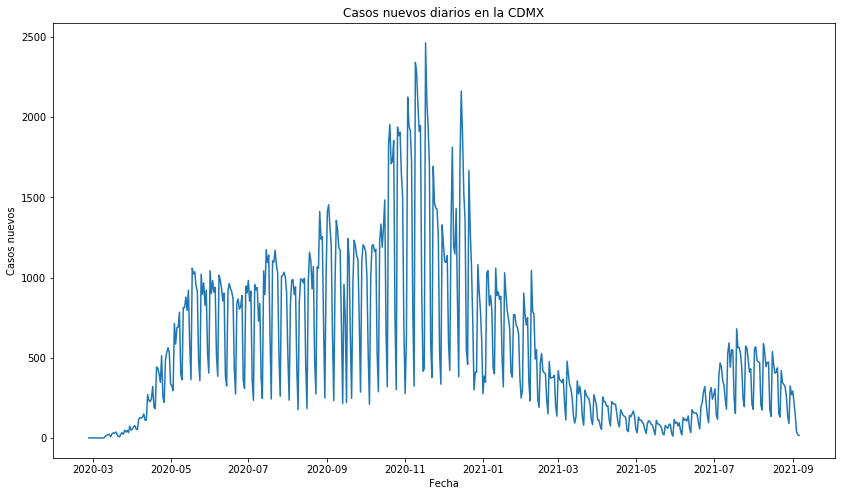

In [45]:
plt.figure(figsize=(14,8))
sns.lineplot(data=casos_nuevos_diarios, x = "FECHA_INGRESO", y="RESULTADO_LAB")
plt.xlabel("Fecha")
plt.ylabel("Casos nuevos")
plt.title("Casos nuevos diarios en la CDMX")
plt.show()

In [50]:
casos_nuevos_diarios["CASOS_ACUMULADOS"] = casos_nuevos_diarios["RESULTADO_LAB"].cumsum(axis=0)

In [54]:
casos_nuevos_diarios.head()

,FECHA_INGRESO,RESULTADO_LAB,CASOS_ACUMULADOS
0,2020-02-27,2,2
1,2020-03-04,1,3
2,2020-03-05,1,4
3,2020-03-07,1,5
4,2020-03-08,1,6


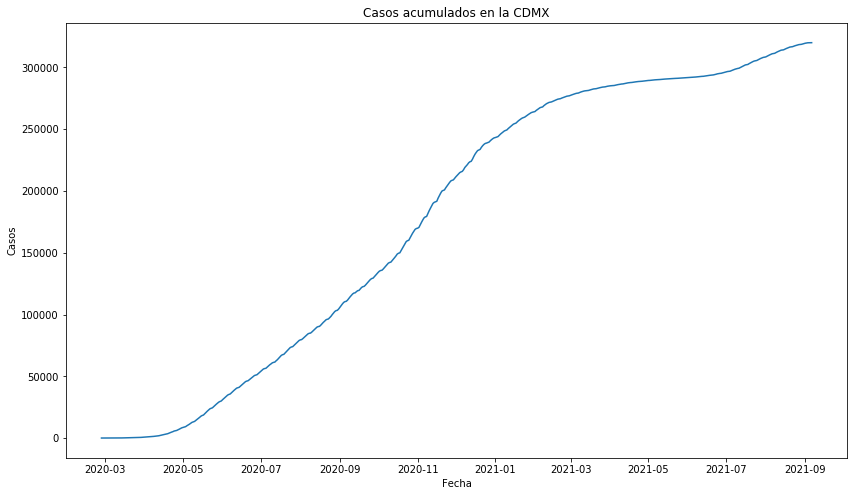

In [55]:
plt.figure(figsize=(14,8))
sns.lineplot(data=casos_nuevos_diarios, x = "FECHA_INGRESO", y="CASOS_ACUMULADOS")
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.title("Casos acumulados en la CDMX")
plt.show()